In [1]:
%load_ext autoreload
%autoreload 2

In [108]:
import numpy as np
import functions.utils as ut
from functions.graph import Graph, most_central_article

# 0. Preprocess

In [100]:
link_cat_dict = ut.link_category_dict()
cat_link_dict = ut.category_link_dict(link_cat_dict)
ut.write_category_processed(cat_link_dict)

# RQ1
Let's first build the graph, by initializating it and then by manually adding each of the edges to it.

In [43]:
path = 'data/wikigraph_reduced.csv'

graph = Graph()

with open(path) as f:
    for i, line in enumerate(f):
        if i == 0:
            continue
        line = line.strip().split()
        line = [int(el) for el in line]
        _, src, dst = line
        graph.add_edge(src, dst)

## Graph info

In [41]:
n_nodes = graph.number_of_nodes()
n_nodes_w_edges = graph.nodes_with_edges()
n_edges = graph.number_of_edges()

if graph.is_directed():
    print('The graph is directed.')
else:
    print('The graph is not directed.')

# Number of articles corresponds to number of nodes src that have an edge src -> dst
print('Number of articles: {}'.format(n_nodes_w_edges))
# Number of hyperlinks corresponds to number of edges
print('Number of hyperlinks: {}'.format(n_edges))

print('Average number of hyperlinks: {:.1f}'.format(n_edges / n_nodes_w_edges))
print('Graph density: {:.10f}'.format(graph.density()))

The graph is directed.
Number of articles: 90920
Number of hyperlinks: 483094
Average number of hyperlinks: 5.3
Graph density: 0.0000499516


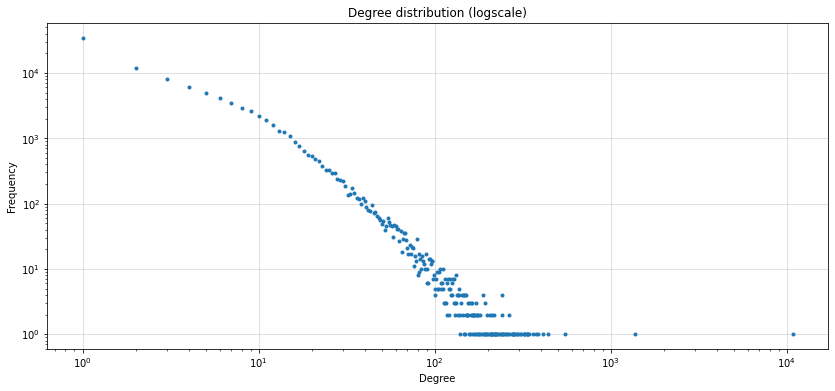

In [44]:
graph.degree_distribution_plot()

# RQ2
Implementation of the function that given in input a page $v$ and a number of clicks $d$, returns the set of pages that a user can reach from $v$ within $d$ clicks.

In [50]:
graph.pages_within_clicks(786432, 2)

{783579,
 785340,
 785517,
 786295,
 786381,
 786382,
 786383,
 786384,
 786385,
 786386,
 786387,
 786388,
 786424,
 786432,
 786433,
 787290,
 787374,
 787377,
 787486,
 787539,
 787552,
 787822,
 999877,
 1000831,
 1622313,
 1622321,
 1622420,
 1622647}

In [47]:
in_degrees = {}
for node in graph.nodes:
    in_degrees[node] = graph.in_degree(node)

In [49]:
max(in_degrees, key=in_degrees.get)

870589

In [90]:
def most_central_article(graph, cat_link_dict, category):
    nodes_in_cat = cat_link_dict[category]
    in_degrees = {}
    for node in nodes_in_cat:
        in_degrees[node] = graph.in_degree(node)
    return max(in_degrees, key=in_degrees.get)

In [106]:
def min_clicks(graph, category, pages, cat_link_dict):
    assert pages.intersection(set(cat_link_dict[category])) == pages, "Input pages are not in category '{}'.".format(category)

In [107]:
min_clicks(graph, 'American_television_actors', {10, 20}, cat_link_dict)

AssertionError: Input pages are not in category 'American_television_actors'.

In [101]:
test = {1, 2, 3}

test.intersection({2, 3}) == {2, 3}

True

In [86]:
d, m = most_central_article(graph, cat_link_dict, 'American_television_actors')

In [92]:
cat_link_dict['American_television_actors']

[1164028,
 1086,
 1039467,
 1165603,
 568532,
 640237,
 1060327,
 1165103,
 1165389,
 1165897,
 1162448,
 1163743,
 1164557,
 1165354,
 291195,
 1224657,
 1069627,
 1163311,
 1502362,
 1061035,
 1163336,
 1503699,
 1164783,
 1062186,
 724806,
 1061765,
 1163323,
 635986,
 1055656,
 1165275,
 1177278,
 1122,
 1162025,
 1163947,
 1164790,
 1211615,
 1578165,
 1629222,
 980,
 1099,
 1121,
 1133,
 1136,
 1138,
 1143,
 1144,
 1151,
 1153,
 26503,
 28874,
 30849,
 39423,
 46823,
 68381,
 71583,
 98092,
 108261,
 110138,
 110179,
 110180,
 110182,
 134102,
 134346,
 134348,
 134361,
 135032,
 135038,
 136003,
 136603,
 136605,
 137921,
 138066,
 139671,
 140256,
 141235,
 142160,
 143153,
 143255,
 143262,
 143533,
 143540,
 143598,
 143619,
 143628,
 143633,
 143642,
 144033,
 144427,
 144642,
 144667,
 146685,
 146688,
 146730,
 146733,
 146754,
 146802,
 146840,
 147477,
 150445,
 151330,
 152788,
 152808,
 152853,
 153095,
 154143,
 154949,
 158122,
 158124,
 166605,
 166611,
 166632,
 18